In [1]:
%matplotlib inline
# matplotlib widget #inline #notebook
import matplotlib.pyplot as plt
#from rich import print
import numpy as np
from numpy import heaviside
from scipy.interpolate import interp1d
from oneD_finger import OneDFinger

Create an applied force profile for the finger and apply to the OneDFinger class

In [2]:
def F_a(self, t):
    """a particular applied force profile"""
    kind='linear' # 'cubic'
    end_first_push = 2.0 # 4.0
    f_a =  interp1d([0.0, 1.0, end_first_push, end_first_push + 1.2, 5.-0.*1., 6., 7., 8., 12.], [0.,0.5, 0.5,0.,0.,1.0,1.0,0., 0.], kind=kind)(t)

    return f_a

OneDFinger.F_a = F_a

In [8]:
def F_a(self, t, t0=1.0, t1=5.0):
    """a particular applied force profile"""
    return 0.4 * heaviside(t - t0, 0.5) * heaviside(t1 - t, 0.5) + heaviside(
        t - 6.5, 0.5
    ) * heaviside(7.5 - t, 0.5)

OneDFinger.F_a = F_a

Create an instance of the OneDFinger class

In [4]:
odf = OneDFinger(m_object = 0.3, F_static = 0.5, f_kinetic = 0.03, x_merge_offset=1.e-6)

Integrate the dynamics:

In [5]:
t,y = odf.integrate()

0.0                Start: v_o0 = 0.0      F_i - F_F = 0.0     
4.45              Merge1: v_o0 = 0.0      F_i - F_F = 0.0     
5.0       Merged tention: v_o0 = -0.723   F_i - F_F = 0.0       x_f0 = 1.5, x_o0 = 1.5, v_f0 = 0.21677, v_o0 = -0.72256, v_fo0 = 0.0
5.0               Bounce: v_o0 = -0.00113 F_i - F_F = 2.26e-05
6.53              Merge1: v_o0 = 0.0      F_i - F_F = 0.499   
7.5       Merged tention: v_o0 = -0.0205  F_i - F_F = 0.106     x_f0 = 1.85, x_o0 = 1.85, v_f0 = 0.81878, v_o0 = -0.02049, v_fo0 = 0.6251


Force sensor bounces:  [] merges:  [4.4480727]
19 merger cm velocity = 0.0


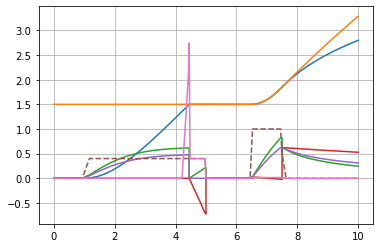

In [6]:
plt.grid(True)
plt.plot(t,y.T)
plt.plot(t,odf.F_a(t),"--")
plt.plot(t,odf.F_sensor_func(t, y),"-")

Force sensor bounces:  [] merges:  [4.4480727]
19 merger cm velocity = 0.0


Text(0.5, 0, 'time [s]')

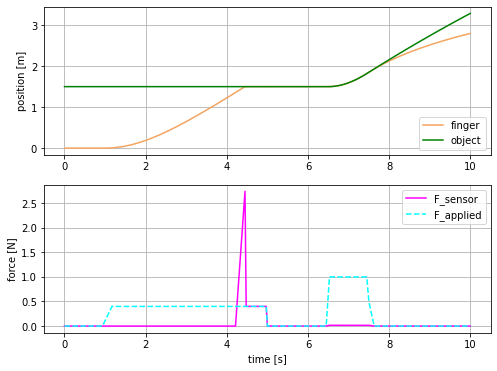

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axp = axs[0]
axf = axs[1]

# position plot
axp.plot(t, y[0, :].T, color="sandybrown", label="finger")
axp.plot(t, y[1, :].T, color="green", label="object")
axp.grid(True)
axp.legend(loc="lower right")
axp.set_ylabel("position [m]")

# force plot
interp_f_sensor = interp1d(t, odf.F_sensor_func(t, y))
axf.plot(t, interp_f_sensor(t), "-", color="magenta", label="F_sensor")
axf.plot(t, odf.F_a(t), "--", color="cyan", label="F_applied")
axf.grid(True)
axf.legend(loc="upper right")
axf.set_ylabel("force [N]")
axf.set_xlabel("time [s]")